In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
Features = ['Pclass', 'Age', 'Fare']
X = train_data[Features]
y = train_data.Survived

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1)
X_train

,Pclass,Age,Fare
35,1,42.0,52.0000
46,3,NaN,15.5000
453,1,49.0,89.1042
291,1,19.0,91.0792
748,1,19.0,53.1000
...,...,...,...
715,3,19.0,7.6500
767,3,30.5,7.7500
72,2,21.0,73.5000
235,3,NaN,7.5500


In [7]:
features_all = np.array(train_data.columns)
features_all1 = np.array(train_data.columns)
features_all = np.delete(features_all, np.where(features_all == 'Survived'))
features_all = np.delete(features_all, np.where(features_all == 'Name'))
features_all = np.delete(features_all, np.where(features_all == 'Ticket'))
features_all = np.delete(features_all, np.where(features_all == 'Cabin'))
print(features_all)
X_all1 = train_data[features_all1]
X_all = train_data[features_all]
y_all = train_data.Survived

X_train_all, X_valid_all, y_train_all, y_valid_all = train_test_split(X_all, y_all, random_state=1)
X_train_all.head()



['PassengerId' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked']


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
35,36,1,male,42.0,1,0,52.0000,S
46,47,3,male,NaN,1,0,15.5000,Q
453,454,1,male,49.0,1,0,89.1042,C
291,292,1,female,19.0,1,0,91.0792,C
748,749,1,male,19.0,1,0,53.1000,S


In [8]:
X_all.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [9]:
X_test_all = test_data[features_all]
X_test_all.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


## CATEGORICAL VALUES

In [10]:
# Get list of categorical variables
cat_vals = (X_all.dtypes == 'object')
object_cols = list(cat_vals[cat_vals].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Sex', 'Embarked']


In [11]:
"""We refer to the number of unique entries of a categorical variable as the cardinality of that categorical variable."""
# Get list of categorical variables
cat_vals1 = (X_all1.dtypes == 'object')
object_cols1 = list(cat_vals1[cat_vals1].index)
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_all1[col].nunique(), object_cols1))
d = dict(zip(object_cols1, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Sex', 2), ('Embarked', 3), ('Cabin', 147), ('Ticket', 681), ('Name', 891)]

In [12]:
# Columns that will be encoded
low_cardinality_cols = [col for col in object_cols1 if X_all1[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols1)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['Sex', 'Embarked']

Categorical columns that will be dropped from the dataset: ['Cabin', 'Ticket', 'Name']


### Drop

In [13]:
# Droping them
drop_X_train = X_train_all.select_dtypes(exclude=['object'])
drop_X_valid = X_valid_all.select_dtypes(exclude=['object'])

drop_X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
35,36,1,42.0,1,0,52.0000
46,47,3,NaN,1,0,15.5000
453,454,1,49.0,1,0,89.1042
291,292,1,19.0,1,0,91.0792
748,749,1,19.0,1,0,53.1000


### Ordinal encoder

In [14]:
from sklearn.preprocessing import OrdinalEncoder

# coping to avoid changind orig data
label_X_train_all = X_train_all.copy()
label_X_valid_all = X_valid_all.copy()
label_X_test_all = X_test_all.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train_all[object_cols] = ordinal_encoder.fit_transform(X_train_all[object_cols])
label_X_valid_all[object_cols] = ordinal_encoder.transform(X_valid_all[object_cols])
label_X_test_all[object_cols] = ordinal_encoder.fit_transform(X_test_all[object_cols])

label_X_train_all.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
35,36,1,1.0,42.0,1,0,52.0000,2.0
46,47,3,1.0,NaN,1,0,15.5000,1.0
453,454,1,1.0,49.0,1,0,89.1042,0.0
291,292,1,0.0,19.0,1,0,91.0792,0.0
748,749,1,1.0,19.0,1,0,53.1000,2.0


In [15]:
label_X_test_all.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1.0,34.5,0,0,7.8292,1.0
1,893,3,0.0,47.0,1,0,7.0000,2.0
2,894,2,1.0,62.0,0,0,9.6875,1.0
3,895,3,1.0,27.0,0,0,8.6625,2.0
4,896,3,0.0,22.0,1,1,12.2875,2.0


### One-hot encoding

In [16]:
from sklearn.preprocessing import OneHotEncoder
"""One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data.
Settings:
handle_unknown='ignore' -> to avoid errors when the validation data contains classes that aren't represented in the training data
sparse=False -> ensures that the encoded columns are returned as a numpy array (instead of a sparse matrix). """

# Apply one-hot encoder to each column with categorical data
one_hot = OneHotEncoder(handle_unknown='ignore', sparse=False)
oh_cols_train_all = pd.DataFrame(one_hot.fit_transform(X_train_all[object_cols]))
oh_cols_valid_all = pd.DataFrame(one_hot.transform(X_valid_all[object_cols]))

# One-hot encoding removed index; put it back
oh_cols_train_all.index = X_train_all.index
oh_cols_valid_all.index = X_valid_all.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train_all = X_train_all.drop(object_cols, axis=1)
num_X_valid_all = X_valid_all.drop(object_cols, axis= 1)

# Add one-hot encoded columns to numerical features
oh_X_train_all = pd.concat([num_X_train_all, oh_cols_train_all], axis=1)
oh_X_valid_all = pd.concat([num_X_valid_all, oh_cols_valid_all], axis=1)

oh_X_train_all.head()

/home/jiri/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,PassengerId,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4,5
35,36,1,42.0,1,0,52.0000,0.0,1.0,0.0,0.0,1.0,0.0
46,47,3,NaN,1,0,15.5000,0.0,1.0,0.0,1.0,0.0,0.0
453,454,1,49.0,1,0,89.1042,0.0,1.0,1.0,0.0,0.0,0.0
291,292,1,19.0,1,0,91.0792,1.0,0.0,1.0,0.0,0.0,0.0
748,749,1,19.0,1,0,53.1000,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
X_train_all = label_X_train_all
X_valid_all = label_X_valid_all
X_test_all = label_X_test_all

## DEALING WITH MISSING VALUES

In [18]:
print(X_train_all.shape)
missing_val_count_by_column = (X_train_all.isnull().sum())
infs_val = (X_train_all.isin([np.inf,-np.inf]).sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
print("\nMissing values:")
print(missing_val_count_by_column[missing_val_count_by_column > 0])
print("\nInfinity values:")
print(infs_val[infs_val > 0])

(668, 8)
Age         133
Embarked      1
dtype: int64

Missing values:
Age         133
Embarked      1
dtype: int64

Infinity values:
Series([], dtype: int64)


### Drop

In [19]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

reduced_X_train.head()

,Pclass,Fare
35,1,52.0000
46,3,15.5000
453,1,89.1042
291,1,91.0792
748,1,53.1000


### Imputation

In [20]:
""" Imputation fills in the missing values with some number. For instance, we can fill in the mean value along each column. """
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

imputed_X_train.head()

,Pclass,Age,Fare
0,1.0,42.000000,52.0000
1,3.0,30.073682,15.5000
2,1.0,49.000000,89.1042
3,1.0,19.000000,91.0792
4,1.0,19.000000,53.1000


In [21]:
# Imputation - X_all
""" Imputation fills in the missing values with some number. For instance, we can fill in the mean value along each column. """
my_imputer = SimpleImputer()
imputed_X_train_all = pd.DataFrame(my_imputer.fit_transform(X_train_all))
imputed_X_valid_all = pd.DataFrame(my_imputer.transform(X_valid_all))
imputed_X_test_all = pd.DataFrame(my_imputer.transform(X_test_all))

# Imputation removed column names; put them back
imputed_X_train_all.columns = X_train_all.columns
imputed_X_valid_all.columns = X_valid_all.columns
imputed_X_test_all.columns = X_test_all.columns

imputed_X_train_all.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,36.0,1.0,1.0,42.000000,1.0,0.0,52.0000,2.0
1,47.0,3.0,1.0,30.073682,1.0,0.0,15.5000,1.0
2,454.0,1.0,1.0,49.000000,1.0,0.0,89.1042,0.0
3,292.0,1.0,0.0,19.000000,1.0,0.0,91.0792,0.0
4,749.0,1.0,1.0,19.000000,1.0,0.0,53.1000,2.0


## MODEL

In [22]:
rf_model = RandomForestClassifier()
rf_model.fit(imputed_X_train_all, y_train)
val_predictions = rf_model.predict(imputed_X_valid_all)
val_mae = mean_absolute_error(val_predictions, y_valid)
print(val_mae)

0.21524663677130046


In [23]:
param_grid = {
    'max_depth': [1, 10, 25,50,100,150],
    'min_samples_leaf': [1, 5, 10,50,100],
    'max_leaf_nodes': [5, 10, 50, 100, 250, 500]
}
dt_model = DecisionTreeClassifier()
gs = GridSearchCV(dt_model, param_grid, scoring='neg_mean_absolute_error', cv=5)
gs.fit(imputed_X_train_all, y_train)

print("best_params:", gs.best_params_)
print("best_score:", gs.best_score_)

best_params: {'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 5}
best_score: -0.18865447200089774


In [24]:
dt_model_used = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=10,min_samples_leaf=5)
dt_model_used.fit(imputed_X_train_all, y_train_all)
dt_mod_preds = dt_model_used.predict(imputed_X_valid_all)
dt_mod_used_mae = mean_absolute_error(dt_mod_preds, y_valid_all)
print("MAE:", dt_mod_used_mae)

MAE: 0.2062780269058296


In [25]:
model = rf_model
final_X_test = imputed_X_test_all
preds_test = model.predict(final_X_test)
#preds_test

In [26]:
print(test_data.head)

<bound method NDFrame.head of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0 

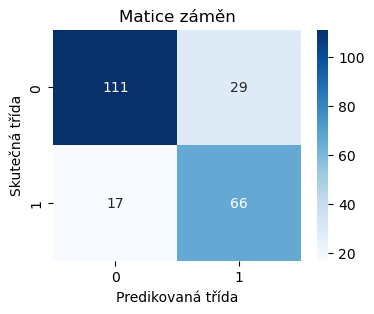

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_true = dt_mod_preds
y_pred_classes = y_valid_all
confusion_mtx = confusion_matrix(y_true,y_pred_classes)W

# Plot
fig, ax = plt.subplots(figsize=(4,3))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predikovaná třída')
ax.set_ylabel('Skutečná třída')
ax.set_title('Matice záměn');
plt.savefig(fname="/mnt/c/Jiri/Code/Python_ml_2/output.svg",format='svg')

In [28]:
# Save test predictions to file
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': preds_test})
output.to_csv('submission.csv', index=False)